#sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

#tanh function
def tanh(x):
    numerator= 1-np.exp(-2*x)
    denominator= 1+np.exp(-2*x)
    return numerator/denominator

#Rectified Linear Unit Fucntion
def ReLU(x):
    if x<0:
        return 0
    else:
        return x

#leaky ReLU function
def leakyReLU(x,alpha=0.01):
    if x<0:
        return (alpha*x)
    else:
        return x

#Exponential linear unit function
def ELU(x,alpha=0.01):
    if x<0:
        return (alpha*(np.exp(x)-1))
    else:
        return x

#swish function
def swish(x,beta):
    return 2*x*sigmoid(beta*x)

#softmax function
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=0)

#forward propagation
def forward_prop(X):
    z1 = np.dot(X,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)

    return y_hat

#backward propagation
def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    
    Wxh = Wxh - alpha * dJ_dWhy
    Why = Why - alpha * dJ_dWxh
    
    return Wxh,Why


###### Building Neural Network From Scratch#######
             XOR gate Operation

In [123]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
x = np.array([ [0, 1], [1, 0], [1, 1], [0, 0] ])
y = np.array([ [1], [1], [0], [0] ])

In [127]:
#number of nodes
num_input =2 
num_hidden = 5
num_output = 1

In [129]:
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

In [131]:
Why = np.random.randn(num_hidden,num_output)
by = np.zeros((1,num_output))

In [133]:
#sigmoid function
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [135]:
#derivative of sigmoid
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [137]:
#forward propagation
def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    
    return z1,a1,z2,y_hat

In [139]:
#backward propgation
def backward_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1) 

    return dJ_dWxh, dJ_dWhy

In [141]:
#cost function
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    
    return J

In [143]:
#learning rate and no of training iterations
alpha = 0.01
num_iterations = 5000

In [145]:
cost = []
for i in range(num_iterations):

    #forward propagation and backward propagation
    z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
    dJ_dWxh, dJ_dWhy = backward_prop(y_hat, z1, a1, z2)

    #updating weights 
    Wxh = Wxh - alpha* dJ_dWxh
    Why = Why - alpha * dJ_dWhy

    #computing cost
    c = cost_function(y, y_hat)

    #storing cost in c
    cost.append(c)

Text(0, 0.5, 'Cost')

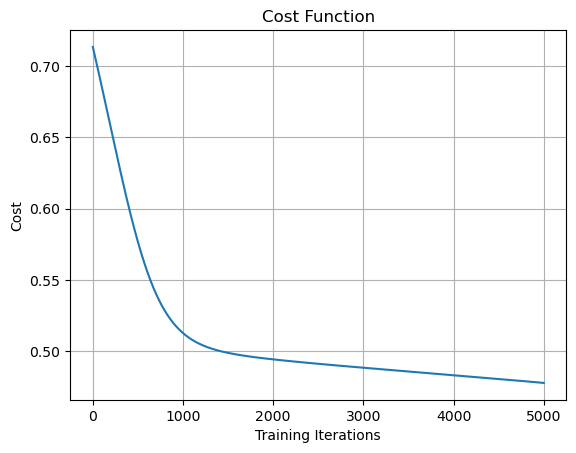

In [147]:
#plot cost function
plt.grid()
plt.plot(range(num_iterations),cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')